# Ett Machine Learning exempel

## Kommande studiecirkel
Vi på Mejsla kommer att under våren anordna en studiecirkel där vi går igenom innehållet i boken [Deep Learning for Coders with fastai and PyTorch: AI Applications Without a PhD](https://course.fast.ai/).

Mer information om studiecirkeln hittas på [anmälningsformuläret](https://docs.google.com/forms/d/e/1FAIpQLSdMznAsCBbhE2s-5VWFgm9pecUM_jUB4VDltKixMfzIx5TfcA/viewform), som även kommer att mailas ut till alla deltagare efter mötet.

I denna Notebook visar vi ett första exempel från boken, där vi tränar en model så att den kan markera om en bild innehåller en hund eller katt.




## Fastbook, fast.ai, PyTorch och TensorFlow
Vi börjar med att installera det Python paket, [fastbook](https://pypi.org/project/fastbook/), som hör till boken. Det innehåller funktioner som används genom boken och gör det enkelt att komma igång med exempel.

Boken är byggd på ramverket [fast.ai](https://www.fast.ai/) - något som kan ses via dess [requirements.txt](https://github.com/fastai/fastbook/blob/master/requirements.txt) fil som listar beroenden - vilket är ett ramverk för deep learning byggt ovanpå (gör det lättare att använda) [PyTorch](https://pytorch.org/), vilket är det framework som gör det tunga jobbet.

PyTorch, främst utvecklat av Facebook's AI Research lab, är ett alternativ till [TensorFlow](https://www.tensorflow.org/), vilket är ett äldre och mer känt bibliotek för machine learning från Google - men underliggande begrepp och teori är överförbar mellan projekten.

Som boken nämner händer mycket saker snabbt inom utveckling i allmänhet och Machine Learning i synnerhet. Vilka bibliotek och ramverk som kommer att användas kommer med stor sannolikhet ändras över tid, men underliggande förståelse för tekniker och begrepp kommer göra det lättare att anpassa sig till och använda till nya verktyg inom området.

Setup-koden kommer att använda Google Drive, och kommer därför be om tillgång till denna:


In [3]:
!pip install -Uqq fastbook
from fastbook import *
setup_book()

## GPU och TPU
En GPU (graphics processing unit) är en grafikprocessor, en mikroprocessor som sitter på en dators grafikkort. Den är mer specialiserad än generella CPU:s, med många fler kärnor som kan utföra mer specialiserade beräknar paralllelt, och som namnet antyder används dessa ursprungligen för att rendera datorgrafik - men samma arkitektur passar väl för att träna modeller inom Machine Learning.

TPU:er (tensor processing units) är än mer specialiserad hårdvara för just Machine Learning. Från Wikipedia:

> Compared to a graphics processing unit, it is designed for a high volume of low precision computation (e.g. as little as 8-bit precision) with more input/output operations per joule, and lacks hardware for rasterisation/texture mapping.

[...]

> Different types of processors are suited for different types of machine learning models, TPUs are well suited for CNNs while GPUs have benefits for some fully-connected neural networks, and CPUs can have advantages for RNNs.



## En första modell

Nedan följer en kodsnutt som trots dess korthet är ett fullständigt system för att skapa och träna en state-of-the-art modell för att känna igen katter eller hundar.

Följande sker:

1. En datamängd vid namn [Oxford-IIIT Pet Dataset](http://www.robots.ox.ac.uk/~vgg/data/pets/) som innehåller 7,349 bilder av katter och hundar från 37 raser kommer laddas ner från fast.ai:s samling av data till den GPU server som används.
2. En *förtränad modell* (pretrained model) som redan har tränats på 1.3 miljoner bilder och konstaterats prestera väl, kommer att laddas ner. Namnet på modellen är `resnet34`.
3. Den förtränade modellen kommer att anpassas (*fine-tuned*) användandes *transfer learning* för att skapa en modell som är specifikt anpassad för att känna igenom katter och hundar.

In [4]:
from fastai.vision.all import *

path = untar_data(URLs.PETS)/'images'

def is_cat(x):
  return x[0].isupper()

dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))

learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.162983,0.025543,0.008796,00:54


epoch,train_loss,valid_loss,error_rate,time
0,0.065430,0.026112,0.007442,00:58


> OBS: Det kommer ta några minuter att ladda ner och anpassa modellen.

# Bedöma modells effektivitet och testa det manuellt

Hur ska vi bedöma hur bra modellen presterar?

Sista kolumnen i tabellen visar error rate, den andel av bilderna som klassificerades inkorrekt.

Som ses av siffran är modellen effektiv trots snabb tid för anpassning, och faktiskt bättre än vad någon skulle kunna prestera för säg 10 år sen.

För att manuellt bekräfta att det fungerar, låt oss ladda upp en bild (använda google sökning efter hund eller katt bilder):

In [10]:
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

Efter att ha laddat upp en bild med Upload-knappen ovan kan vi använda modellen för att klassificera bilden:

In [11]:
img = PILImage.create(uploader.data[0])
is_cat,_,probs = learn.predict(img)
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")

Is this a cat?: True.
Probability it's a cat: 1.000000


För att förklara vad vi gjort ska vi backa ut ett steg.

## Historik
På 40-talet skapades en modell av neuroner i hjärnan.

![Neuroner](https://github.com/fastai/fastbook/raw/fb570779062177662fbfde0f5dbb1e9f08dabbee/images/chapter7_neuron.png)


## Vad är Machine Learning?


*Machine learning* är, likt vanlig programmering, ett sätt att få datorer at utföra ett önskat jobb. Med vanlig programmering menar vi modellen där vi exakt beskriver de steg ett program ska ta för att givet input producera ett visst output:


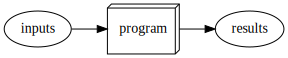

In [13]:
gv('''program[shape=box3d width=1 height=0.7]
inputs->program->results''')

Men för att känna igen objekt i en bild är det svårt - vad är egentligen stegen våra hjärnor tar för att känna igen om en bild representerar en hund eller en katt? Hur skulle man översätta det till kod? Svaret är att det är svårt - det händer i våra hjärnor utan att vi är medvetna om exakta stegen.

På 40-talet börjades det formuleras ett annat sätt för datorer att utföra uppgifter som kallades *machine learning*. I en klassisk skrift från 1962,  "Artificial Intelligence: A Frontier of Automation", skrevs det (fritt översatt):

> Att programmera en dator för en sådan uppgift är en svår (om inte omöjlig) uppgift. Inte nödvändigtvis för att en inneboende komplexitet i problemet, utan för nödvändigheten att i detalj skriva ner varje steg. Datorer, som de flesta programmerare ser det, är enorma idioter, inte enorma hjärnor.


Den grundläggande idén var att istället för att i detalj beskriva hur problemet ska lösas, så visar vi programmet exempel på problem att lösa, och låter det sedan självt koma på lösningar.

Det här visade sig snabbt lovande i initiala experiment - ett program för damspel, checkers, blev statsmästaste i Connecticut 1961.

För att sammanfatta begrepp som användes:

- Vikter (`weights`) är variabler som ges till modellen. Tillsammans med input-datat definierar de vilken output en viss modell ger.

De kan ses som en form av input:

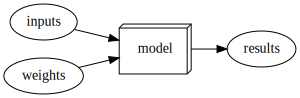

In [23]:
gv('''model[shape=box3d width=1 height=0.7] inputs->model->results; weights->model''')

Vi har här också ändrat namnet från *program* till *model*, vilket är modernare namngivning och visar att det rör sig om en speciell typ av program skiljt från traditionella datorprogram.

En *model* är ett specill typ av program som kan göra *olika saker* beroende på de *weights* som anges.

- I dam-spelet kan olika vikter vara olika strategier.
- I våran hund&katt igenkännare är vikter det som erhållts från vår anpassning av en generell bild-klassifierare till att just känna igen katter och hundar.

För att en model ska kunna lära sig behövs dessutom ett *automatiskt sätt att testa effektiviteten hos en viss uppsättning vikter*.

- I fallet med damspelet är effektiviteten hur väl modellen spelade, och ett automatiskt sätt att testa detta skulle kunna vara att låta två modeller spela med varandra.
- I våran hund&katt igenkännare så använda vi oss av ett *facit* - någon har redan tagit sig tid att manuellt markera vilka bilder som avbildade katter och vilka som avbildade hundar, och markerat detta genom att låta filnamnet börja med stor bokstav eller inte.

Slutligen så behövs en *mekanism för att uppdatera vikterna för att maximera effektiviteten*. Detaljerna här är icke triviala, men vi skulle kunna tänka oss att vi tittar på skillnader mellan en vinnande modell och en som förlorar, och ändra vikterna en bit åt det håll som vinnande modellen är i.


Nedan visas en fullständig modell av det vi gått igenom:

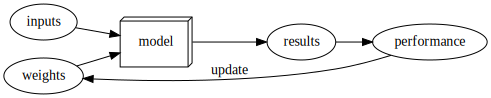

In [22]:
gv('''ordering=in model[shape=box3d width=1 height=0.7] inputs->model->results; weights->model; results->performance performance->weights[constraint=false label=update]''')

Lägg märke till skillnaden mellan modellens *resultat* (t.ex. de drag som sker i Dam-spelet) och dess *effektivitet* (t.ex. om det vinner ett spel, och isf hur snabbt).

När modellen väl har blivit tränad - dvs, när vi har bestämt oss för slutliga vikter, så kan vi se vikterna som del av modellen, och användandet av den därefter blir som visas nedan:

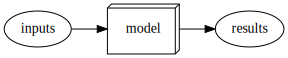

In [21]:
gv('''model[shape=box3d width=1 height=0.7] inputs->model->results''')

Om vi jämför med den initiala modellen för ett traditionellt datorprogram ser vi att den ser likadan ut, med *program* utbytt mot *model*. Det är en trevlig egenskap:
- När väl modellen är tränad kan den användas som ett traditionellt program, utan att vara krångligare för den som anropar det.

För att sammanfatta definitionen:

> Machine Learning: The training of programs developed by allowing a computer to learn from its experience, rather than through manually coding the individual steps.

### What Is a Neural Network?

It's not too hard to imagine what the model might look like for a checkers program. There might be a range of checkers strategies encoded, and some kind of search mechanism, and then the weights could vary how strategies are selected, what parts of the board are focused on during a search, and so forth. But it's not at all obvious what the model might look like for an image recognition program, or for understanding text, or for many other interesting problems we might imagine.

What we would like is some kind of function that is so flexible that it could be used to solve any given problem, just by varying its weights. Amazingly enough, this function actually exists! It's the neural network, which we already discussed. That is, if you regard a neural network as a mathematical function, it turns out to be a function which is extremely flexible depending on its weights. A mathematical proof called the *universal approximation theorem* shows that this function can solve any problem to any level of accuracy, in theory. The fact that neural networks are so flexible means that, in practice, they are often a suitable kind of model, and you can focus your effort on the process of training them—that is, of finding good weight assignments.

But what about that process?  One could imagine that you might need to find a new "mechanism" for automatically updating weights for every problem. This would be laborious. What we'd like here as well is a completely general way to update the weights of a neural network, to make it improve at any given task. Conveniently, this also exists!

This is called *stochastic gradient descent* (SGD). We'll see how neural networks and SGD work in detail in <<chapter_mnist_basics>>, as well as explaining the universal approximation theorem. For now, however, we will instead use Samuel's own words: *We need not go into the details of such a procedure to see that it could be made entirely automatic and to see that a machine so programmed would "learn" from its experience.*

> J: Don't worry, neither SGD nor neural nets are mathematically complex. Both nearly entirely rely on addition and multiplication to do their work (but they do a _lot_ of addition and multiplication!). The main reaction we hear from students when they see the details is: "Is that all it is?"

In other words, to recap, a neural network is a particular kind of machine learning model, which fits right in to Samuel's original conception. Neural networks are special because they are highly flexible, which means they can solve an unusually wide range of problems just by finding the right weights. This is powerful, because stochastic gradient descent provides us a way to find those weight values automatically.

Having zoomed out, let's now zoom back in and revisit our image classification problem using Samuel's framework.

Our inputs are the images. Our weights are the weights in the neural net. Our model is a neural net. Our results are the values that are calculated by the neural net, like "dog" or "cat."

What about the next piece, an *automatic means of testing the effectiveness of any current weight assignment in terms of actual performance*? Determining "actual performance" is easy enough: we can simply define our model's performance as its accuracy at predicting the correct answers.

Putting this all together, and assuming that SGD is our mechanism for updating the weight assignments, we can see how our image classifier is a machine learning model, much like Samuel envisioned.

### A Bit of Deep Learning Jargon

Samuel was working in the 1960s, and since then terminology has changed. Here is the modern deep learning terminology for all the pieces we have discussed:

- The functional form of the *model* is called its *architecture* (but be careful—sometimes people use *model* as a synonym of *architecture*, so this can get confusing).
- The *weights* are called *parameters*.
- The *predictions* are calculated from the *independent variable*, which is the *data* not including the *labels*.
- The *results* of the model are called *predictions*.
- The measure of *performance* is called the *loss*.
- The loss depends not only on the predictions, but also the correct *labels* (also known as *targets* or the *dependent variable*); e.g., "dog" or "cat."

After making these changes, our diagram in <<training_loop>> looks like <<detailed_loop>>.

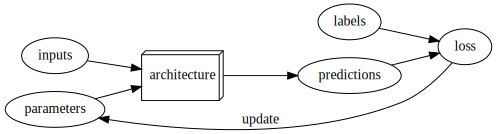

In [17]:
#hide_input
#caption Detailed training loop
#id detailed_loop
gv('''ordering=in
model[shape=box3d width=1 height=0.7 label=architecture]
inputs->model->predictions; parameters->model; labels->loss; predictions->loss
loss->parameters[constraint=false label=update]''')

### Limitations Inherent To Machine Learning

From this picture we can now see some fundamental things about training a deep learning model:

- A model cannot be created without data.
- A model can only learn to operate on the patterns seen in the input data used to train it.
- This learning approach only creates *predictions*, not recommended *actions*.
- It's not enough to just have examples of input data; we need *labels* for that data too (e.g., pictures of dogs and cats aren't enough to train a model; we need a label for each one, saying which ones are dogs, and which are cats).

Generally speaking, we've seen that most organizations that say they don't have enough data, actually mean they don't have enough *labeled* data. If any organization is interested in doing something in practice with a model, then presumably they have some inputs they plan to run their model against. And presumably they've been doing that some other way for a while (e.g., manually, or with some heuristic program), so they have data from those processes! For instance, a radiology practice will almost certainly have an archive of medical scans (since they need to be able to check how their patients are progressing over time), but those scans may not have structured labels containing a list of diagnoses or interventions (since radiologists generally create free-text natural language reports, not structured data). We'll be discussing labeling approaches a lot in this book, because it's such an important issue in practice.

Since these kinds of machine learning models can only make *predictions* (i.e., attempt to replicate labels), this can result in a significant gap between organizational goals and model capabilities. For instance, in this book you'll learn how to create a *recommendation system* that can predict what products a user might purchase. This is often used in e-commerce, such as to customize products shown on a home page by showing the highest-ranked items. But such a model is generally created by looking at a user and their buying history (*inputs*) and what they went on to buy or look at (*labels*), which means that the model is likely to tell you about products the user already has or already knows about, rather than new products that they are most likely to be interested in hearing about. That's very different to what, say, an expert at your local bookseller might do, where they ask questions to figure out your taste, and then tell you about authors or series that you've never heard of before.

Another critical insight comes from considering how a model interacts with its environment. This can create *feedback loops*, as described here:

- A *predictive policing* model is created based on where arrests have been made in the past. In practice, this is not actually predicting crime, but rather predicting arrests, and is therefore partially simply reflecting biases in existing policing processes.
- Law enforcement officers then might use that model to decide where to focus their police activity, resulting in increased arrests in those areas.
- Data on these additional arrests would then be fed back in to retrain future versions of the model.

This is a *positive feedback loop*, where the more the model is used, the more biased the data becomes, making the model even more biased, and so forth.

Feedback loops can also create problems in commercial settings. For instance, a video recommendation system might be biased toward recommending content consumed by the biggest watchers of video (e.g., conspiracy theorists and extremists tend to watch more online video content than the average), resulting in those users increasing their video consumption, resulting in more of those kinds of videos being recommended. We'll consider this topic more in detail in <<chapter_ethics>>.

Now that you have seen the base of the theory, let's go back to our code example and see in detail how the code corresponds to the process we just described.

### How Our Image Recognizer Works

Let's see just how our image recognizer code maps to these ideas. We'll put each line into a separate cell, and look at what each one is doing (we won't explain every detail of every parameter yet, but will give a description of the important bits; full details will come later in the book).

The first line imports all of the fastai.vision library.

```python
from fastai.vision.all import *
```

This gives us all of the functions and classes we will need to create a wide variety of computer vision models.

> J: A lot of Python coders recommend avoiding importing a whole library like this (using the `import *` syntax), because in large software projects it can cause problems. However, for interactive work such as in a Jupyter notebook, it works great. The fastai library is specially designed to support this kind of interactive use, and it will only import the necessary pieces into your environment.

The second line downloads a standard dataset from the [fast.ai datasets collection](https://course.fast.ai/datasets) (if not previously downloaded) to your server, extracts it (if not previously extracted), and returns a `Path` object with the extracted location:

```python
path = untar_data(URLs.PETS)/'images'
```

> S: Throughout my time studying at fast.ai, and even still today, I've learned a lot about productive coding practices. The fastai library and fast.ai notebooks are full of great little tips that have helped make me a better programmer. For instance, notice that the fastai library doesn't just return a string containing the path to the dataset, but a `Path` object. This is a really useful class from the Python 3 standard library that makes accessing files and directories much easier. If you haven't come across it before, be sure to check out its documentation or a tutorial and try it out. Note that the https://book.fast.ai[website] contains links to recommended tutorials for each chapter. I'll keep letting you know about little coding tips I've found useful as we come across them.

In the third line we define a function, `is_cat`, labels cats based on a filename rule provided by the dataset creators:
```python
def is_cat(x): return x[0].isupper()
```

We use that function in the fourth line, which tells fastai what kind of dataset we have, and how it is structured:

```python
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))
```

There are various different classes for different kinds of deep learning datasets and problems—here we're using `ImageDataLoaders`. The first part of the class name will generally be the type of data you have, such as image, or text.

The other important piece of information that we have to tell fastai is how to get the labels from the dataset. Computer vision datasets are normally structured in such a way that the label for an image is part of the filename, or path—most commonly the parent folder name. fastai comes with a number of standardized labeling methods, and ways to write your own. Here we're telling fastai to use the `is_cat` function we just defined.

Finally, we define the `Transform`s that we need. A `Transform` contains code that is applied automatically during training; fastai includes many predefined `Transform`s, and adding new ones is as simple as creating a Python function. There are two kinds: `item_tfms` are applied to each item (in this case, each item is resized to a 224-pixel square), while `batch_tfms` are applied to a *batch* of items at a time using the GPU, so they're particularly fast (we'll see many examples of these throughout this book).

Why 224 pixels? This is the standard size for historical reasons (old pretrained models require this size exactly), but you can pass pretty much anything. If you increase the size, you'll often get a model with better results (since it will be able to focus on more details), but at the price of speed and memory consumption; the opposite is true if you decrease the size. 

> Note: Classification and Regression: _classification_ and _regression_ have very specific meanings in machine learning. These are the two main types of model that we will be investigating in this book. A classification model is one which attempts to predict a class, or category. That is, it's predicting from a number of discrete possibilities, such as "dog" or "cat." A regression model is one which attempts to predict one or more numeric quantities, such as a temperature or a location. Sometimes people use the word _regression_ to refer to a particular kind of model called a _linear regression model_; this is a bad practice, and we won't be using that terminology in this book!

The Pet dataset contains 7,390 pictures of dogs and cats, consisting of 37 different breeds. Each image is labeled using its filename: for instance the file *great\_pyrenees\_173.jpg* is the 173rd example of an image of a Great Pyrenees breed dog in the dataset. The filenames start with an uppercase letter if the image is a cat, and a lowercase letter otherwise. We have to tell fastai how to get labels from the filenames, which we do by calling `from_name_func` (which means that labels can be extracted using a function applied to the filename), and passing `x[0].isupper()`, which evaluates to `True` if the first letter is uppercase (i.e., it's a cat).

The most important parameter to mention here is `valid_pct=0.2`. This tells fastai to hold out 20% of the data and *not use it for training the model at all*. This 20% of the data is called the *validation set*; the remaining 80% is called the *training set*. The validation set is used to measure the accuracy of the model. By default, the 20% that is held out is selected randomly. The parameter `seed=42` sets the *random seed* to the same value every time we run this code, which means we get the same validation set every time we run it—this way, if we change our model and retrain it, we know that any differences are due to the changes to the model, not due to having a different random validation set.

fastai will *always* show you your model's accuracy using *only* the validation set, *never* the training set. This is absolutely critical, because if you train a large enough model for a long enough time, it will eventually memorize the label of every item in your dataset! The result will not actually be a useful model, because what we care about is how well our model works on *previously unseen images*. That is always our goal when creating a model: for it to be useful on data that the model only sees in the future, after it has been trained.

Even when your model has not fully memorized all your data, earlier on in training it may have memorized certain parts of it. As a result, the longer you train for, the better your accuracy will get on the training set; the validation set accuracy will also improve for a while, but eventually it will start getting worse as the model starts to memorize the training set, rather than finding generalizable underlying patterns in the data. When this happens, we say that the model is *overfitting*.

<<img_overfit>> shows what happens when you overfit, using a simplified example where we have just one parameter, and some randomly generated data based on the function `x**2`. As you can see, although the predictions in the overfit model are accurate for data near the observed data points, they are way off when outside of that range.

<img src="https://github.com/fastai/fastbook/blob/master/images/att_00000.png?raw=1" alt="Example of overfitting" caption="Example of overfitting" id="img_overfit" width="700">

**Overfitting is the single most important and challenging issue** when training for all machine learning practitioners, and all algorithms. As you will see, it is very easy to create a model that does a great job at making predictions on the exact data it has been trained on, but it is much harder to make accurate predictions on data the model has never seen before. And of course, this is the data that will actually matter in practice. For instance, if you create a handwritten digit classifier (as we will very soon!) and use it to recognize numbers written on checks, then you are never going to see any of the numbers that the model was trained on—check will have slightly different variations of writing to deal with. You will learn many methods to avoid overfitting in this book. However, you should only use those methods after you have confirmed that overfitting is actually occurring (i.e., you have actually observed the validation accuracy getting worse during training). We often see practitioners using over-fitting avoidance techniques even when they have enough data that they didn't need to do so, ending up with a model that may be less accurate than what they could have achieved.

> important: Validation Set: When you train a model, you must _always_ have both a training set and a validation set, and must measure the accuracy of your model only on the validation set. If you train for too long, with not enough data, you will see the accuracy of your model start to get worse; this is called _overfitting_. fastai defaults `valid_pct` to `0.2`, so even if you forget, fastai will create a validation set for you!

The fifth line of the code training our image recognizer tells fastai to create a *convolutional neural network* (CNN) and specifies what *architecture* to use (i.e. what kind of model to create), what data we want to train it on, and what *metric* to use:

```python
learn = cnn_learner(dls, resnet34, metrics=error_rate)
```

Why a CNN? It's the current state-of-the-art approach to creating computer vision models. We'll be learning all about how CNNs work in this book. Their structure is inspired by how the human vision system works.

There are many different architectures in fastai, which we will introduce in this book (as well as discussing how to create your own). Most of the time, however, picking an architecture isn't a very important part of the deep learning process. It's something that academics love to talk about, but in practice it is unlikely to be something you need to spend much time on. There are some standard architectures that work most of the time, and in this case we're using one called _ResNet_ that we'll be talking a lot about during the book; it is both fast and accurate for many datasets and problems. The `34` in `resnet34` refers to the number of layers in this variant of the architecture (other options are `18`, `50`, `101`, and `152`). Models using architectures with more layers take longer to train, and are more prone to overfitting (i.e. you can't train them for as many epochs before the accuracy on the validation set starts getting worse). On the other hand, when using more data, they can be quite a bit more accurate.

What is a metric? A *metric* is a function that measures the quality of the model's predictions using the validation set, and will be printed at the end of each *epoch*. In this case, we're using `error_rate`, which is a function provided by fastai that does just what it says: tells you what percentage of images in the validation set are being classified incorrectly. Another common metric for classification is `accuracy` (which is just `1.0 - error_rate`). fastai provides many more, which will be discussed throughout this book.

The concept of a metric may remind you of *loss*, but there is an important distinction. The entire purpose of loss is to define a "measure of performance" that the training system can use to update weights automatically. In other words, a good choice for loss is a choice that is easy for stochastic gradient descent to use. But a metric is defined for human consumption, so a good metric is one that is easy for you to understand, and that hews as closely as possible to what you want the model to do. At times, you might decide that the loss function is a suitable metric, but that is not necessarily the case.

`cnn_learner` also has a parameter `pretrained`, which defaults to `True` (so it's used in this case, even though we haven't specified it), which sets the weights in your model to values that have already been trained by experts to recognize a thousand different categories across 1.3 million photos (using the famous [*ImageNet* dataset](http://www.image-net.org/)). A model that has weights that have already been trained on some other dataset is called a *pretrained model*. You should nearly always use a pretrained model, because it means that your model, before you've even shown it any of your data, is already very capable. And, as you'll see, in a deep learning model many of these capabilities are things you'll need, almost regardless of the details of your project. For instance, parts of pretrained models will handle edge, gradient, and color detection, which are needed for many tasks.

When using a pretrained model, `cnn_learner` will remove the last layer, since that is always specifically customized to the original training task (i.e. ImageNet dataset classification), and replace it with one or more new layers with randomized weights, of an appropriate size for the dataset you are working with. This last part of the model is known as the *head*.

Using pretrained models is the *most* important method we have to allow us to train more accurate models, more quickly, with less data, and less time and money. You might think that would mean that using pretrained models would be the most studied area in academic deep learning... but you'd be very, very wrong! The importance of pretrained models is generally not recognized or discussed in most courses, books, or software library features, and is rarely considered in academic papers. As we write this at the start of 2020, things are just starting to change, but it's likely to take a while. So be careful: most people you speak to will probably greatly underestimate what you can do in deep learning with few resources, because they probably won't deeply understand how to use pretrained models.

Using a pretrained model for a task different to what it was originally trained for is known as *transfer learning*. Unfortunately, because transfer learning is so under-studied, few domains have pretrained models available. For instance, there are currently few pretrained models available in medicine, making transfer learning challenging to use in that domain. In addition, it is not yet well understood how to use transfer learning for tasks such as time series analysis.

> jargon: Transfer learning: Using a pretrained model for a task different to what it was originally trained for.

The sixth line of our code tells fastai how to *fit* the model:

```python
learn.fine_tune(1)
```

As we've discussed, the architecture only describes a *template* for a mathematical function; it doesn't actually do anything until we provide values for the millions of parameters it contains.

This is the key to deep learning—determining how to fit the parameters of a model to get it to solve your problem. In order to fit a model, we have to provide at least one piece of information: how many times to look at each image (known as number of *epochs*). The number of epochs you select will largely depend on how much time you have available, and how long you find it takes in practice to fit your model. If you select a number that is too small, you can always train for more epochs later.

But why is the method called `fine_tune`, and not `fit`? fastai actually *does* have a method called `fit`, which does indeed fit a model (i.e. look at images in the training set multiple times, each time updating the parameters to make the predictions closer and closer to the target labels). But in this case, we've started with a pretrained model, and we don't want to throw away all those capabilities that it already has. As you'll learn in this book, there are some important tricks to adapt a pretrained model for a new dataset—a process called *fine-tuning*.

> jargon: Fine-tuning: A transfer learning technique where the parameters of a pretrained model are updated by training for additional epochs using a different task to that used for pretraining.

When you use the `fine_tune` method, fastai will use these tricks for you. There are a few parameters you can set (which we'll discuss later), but in the default form shown here, it does two steps:

1. Use one epoch to fit just those parts of the model necessary to get the new random head to work correctly with your dataset.
1. Use the number of epochs requested when calling the method to fit the entire model, updating the weights of the later layers (especially the head) faster than the earlier layers (which, as we'll see, generally don't require many changes from the pretrained weights).

The *head* of a model is the part that is newly added to be specific to the new dataset. An *epoch* is one complete pass through the dataset. After calling `fit`, the results after each epoch are printed, showing the epoch number, the training and validation set losses (the "measure of performance" used for training the model), and any *metrics* you've requested (error rate, in this case).

So, with all this code our model learned to recognize cats and dogs just from labeled examples. But how did it do it?

### What Our Image Recognizer Learned

## Validation Sets and Test Sets

As we've discussed, the goal of a model is to make predictions about data. But the model training process is fundamentally dumb. If we trained a model with all our data, and then evaluated the model using that same data, we would not be able to tell how well our model can perform on data it hasn’t seen. Without this very valuable piece of information to guide us in training our model, there is a very good chance it would become good at making predictions about that data but would perform poorly on new data.

To avoid this, our first step was to split our dataset into two sets: the *training set* (which our model sees in training) and the *validation set*, also known as the *development set* (which is used only for evaluation). This lets us test that the model learns lessons from the training data that generalize to new data, the validation data.

One way to understand this situation is that, in a sense, we don't want our model to get good results by "cheating." If it makes an accurate prediction for a data item, that should be because it has learned characteristics of that kind of item, and not because the model has been shaped by *actually having seen that particular item*.

Splitting off our validation data means our model never sees it in training and so is completely untainted by it, and is not cheating in any way. Right?

In fact, not necessarily. The situation is more subtle. This is because in realistic scenarios we rarely build a model just by training its weight parameters once. Instead, we are likely to explore many versions of a model through various modeling choices regarding network architecture, learning rates, data augmentation strategies, and other factors we will discuss in upcoming chapters. Many of these choices can be described as choices of *hyperparameters*. The word reflects that they are parameters about parameters, since they are the higher-level choices that govern the meaning of the weight parameters.

The problem is that even though the ordinary training process is only looking at predictions on the training data when it learns values for the weight parameters, the same is not true of us. We, as modelers, are evaluating the model by looking at predictions on the validation data when we decide to explore new hyperparameter values! So subsequent versions of the model are, indirectly, shaped by us having seen the validation data. Just as the automatic training process is in danger of overfitting the training data, we are in danger of overfitting the validation data through human trial and error and exploration.

The solution to this conundrum is to introduce another level of even more highly reserved data, the *test set*. Just as we hold back the validation data from the training process, we must hold back the test set data even from ourselves. It cannot be used to improve the model; it can only be used to evaluate the model at the very end of our efforts. In effect, we define a hierarchy of cuts of our data, based on how fully we want to hide it from training and modeling processes: training data is fully exposed, the validation data is less exposed, and test data is totally hidden. This hierarchy parallels the different kinds of modeling and evaluation processes themselves—the automatic training process with back propagation, the more manual process of trying different hyper-parameters between training sessions, and the assessment of our final result.

The test and validation sets should have enough data to ensure that you get a good estimate of your accuracy. If you're creating a cat detector, for instance, you generally want at least 30 cats in your validation set. That means that if you have a dataset with thousands of items, using the default 20% validation set size may be more than you need. On the other hand, if you have lots of data, using some of it for validation probably doesn't have any downsides.

Having two levels of "reserved data"—a validation set and a test set, with one level representing data that you are virtually hiding from yourself—may seem a bit extreme. But the reason it is often necessary is because models tend to gravitate toward the simplest way to do good predictions (memorization), and we as fallible humans tend to gravitate toward fooling ourselves about how well our models are performing. The discipline of the test set helps us keep ourselves intellectually honest. That doesn't mean we *always* need a separate test set—if you have very little data, you may need to just have a validation set—but generally it's best to use one if at all possible.

This same discipline can be critical if you intend to hire a third party to perform modeling work on your behalf. A third party might not understand your requirements accurately, or their incentives might even encourage them to misunderstand them. A good test set can greatly mitigate these risks and let you evaluate whether their work solves your actual problem.

To put it bluntly, if you're a senior decision maker in your organization (or you're advising senior decision makers), the most important takeaway is this: if you ensure that you really understand what test and validation sets are and why they're important, then you'll avoid the single biggest source of failures we've seen when organizations decide to use AI. For instance, if you're considering bringing in an external vendor or service, make sure that you hold out some test data that the vendor *never gets to see*. Then *you* check their model on your test data, using a metric that *you* choose based on what actually matters to you in practice, and *you* decide what level of performance is adequate. (It's also a good idea for you to try out some simple baseline yourself, so you know what a really simple model can achieve. Often it'll turn out that your simple model performs just as well as one produced by an external "expert"!)

### Use Judgment in Defining Test Sets

To do a good job of defining a validation set (and possibly a test set), you will sometimes want to do more than just randomly grab a fraction of your original dataset. Remember: a key property of the validation and test sets is that they must be representative of the new data you will see in the future. This may sound like an impossible order! By definition, you haven’t seen this data yet. But you usually still do know some things.

It's instructive to look at a few example cases. Many of these examples come from predictive modeling competitions on the [Kaggle](https://www.kaggle.com/) platform, which is a good representation of problems and methods you might see in practice.

One case might be if you are looking at time series data. For a time series, choosing a random subset of the data will be both too easy (you can look at the data both before and after the dates you are trying to predict) and not representative of most business use cases (where you are using historical data to build a model for use in the future). If your data includes the date and you are building a model to use in the future, you will want to choose a continuous section with the latest dates as your validation set (for instance, the last two weeks or last month of available data).

Suppose you want to split the time series data in <<timeseries1>> into training and validation sets.

<img src="https://github.com/fastai/fastbook/blob/master/images/timeseries1.png?raw=1" width="400" id="timeseries1" caption="A time series" alt="A serie of values">

A random subset is a poor choice (too easy to fill in the gaps, and not indicative of what you'll need in production), as we can see in <<timeseries2>>.

<img src="https://github.com/fastai/fastbook/blob/master/images/timeseries2.png?raw=1" width="400" id="timeseries2" caption="A poor training subset" alt="Random training subset">

Instead, use the earlier data as your training set (and the later data for the validation set), as shown in <<timeseries3>>.

<img src="https://github.com/fastai/fastbook/blob/master/images/timeseries3.png?raw=1" width="400" id="timeseries3" caption="A good training subset" alt="Training subset using the data up to a certain timestamp">

For example, Kaggle had a competition to [predict the sales in a chain of Ecuadorian grocery stores](https://www.kaggle.com/c/favorita-grocery-sales-forecasting). Kaggle's training data ran from Jan 1 2013 to Aug 15 2017, and the test data spanned Aug 16 2017 to Aug 31 2017. That way, the competition organizer ensured that entrants were making predictions for a time period that was *in the future*, from the perspective of their model. This is similar to the way quant hedge fund traders do *back-testing* to check whether their models are predictive of future periods, based on past data.

A second common case is when you can easily anticipate ways the data you will be making predictions for in production may be *qualitatively different* from the data you have to train your model with.

In the Kaggle [distracted driver competition](https://www.kaggle.com/c/state-farm-distracted-driver-detection), the independent variables are pictures of drivers at the wheel of a car, and the dependent variables are categories such as texting, eating, or safely looking ahead. Lots of pictures are of the same drivers in different positions, as we can see in <<img_driver>>. If you were an insurance company building a model from this data, note that you would be most interested in how the model performs on drivers it hasn't seen before (since you would likely have training data only for a small group of people). In recognition of this, the test data for the competition consists of images of people that don't appear in the training set.

<img src="https://github.com/fastai/fastbook/blob/master/images/driver.PNG?raw=1" width="600" id="img_driver" caption="Two pictures from the training data" alt="Two pictures from the training data, showing the same driver">

If you put one of the images in <<img_driver>> in your training set and one in the validation set, your model will have an easy time making a prediction for the one in the validation set, so it will seem to be performing better than it would on new people. Another perspective is that if you used all the people in training your model, your model might be overfitting to particularities of those specific people, and not just learning the states (texting, eating, etc.).

A similar dynamic was at work in the [Kaggle fisheries competition](https://www.kaggle.com/c/the-nature-conservancy-fisheries-monitoring) to identify the species of fish caught by fishing boats in order to reduce illegal fishing of endangered populations.  The test set consisted of boats that didn't appear in the training data.  This means that you'd want your validation set to include boats that are not in the training set.

Sometimes it may not be clear how your validation data will differ.  For instance, for a problem using satellite imagery, you'd need to gather more information on whether the training set just contained certain geographic locations, or if it came from geographically scattered data.